# Pair Trading Strategy


In [42]:
import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6) # (18, 8)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2022,1,1)
end = datetime.datetime(2022,6,17)
# end = datetime.date.today()
end

Populating the interactive namespace from numpy and matplotlib


c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


datetime.datetime(2022, 6, 17, 0, 0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

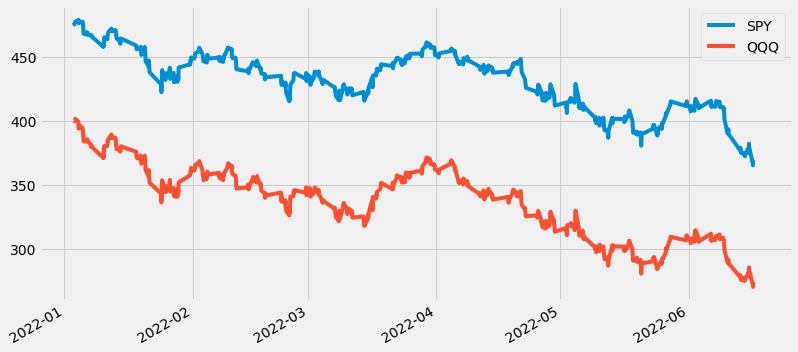

In [43]:
# // should add the ETFs: TIT and TEC 

ls = ['SPY', 'QQQ']
# ls = ['ROKU', 'SHOP'] 

ETF = ls[0]
ls  = list(set(ls))

data = {} 
for i in ls:
  arry = yf.download(i, start, end, interval = '1h')
  data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)
stocks.plot(grid = True)

In [44]:
# np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

(807, 2)

(806, 2)

,SPY,QQQ
2022-01-03 09:30:00-05:00,476.750000,399.980011
2022-01-03 10:30:00-05:00,475.529999,399.799988
2022-01-03 11:30:00-05:00,475.929993,399.899994
2022-01-03 12:30:00-05:00,476.060089,400.279999
2022-01-03 13:30:00-05:00,476.920013,401.100006


<AxesSubplot:>

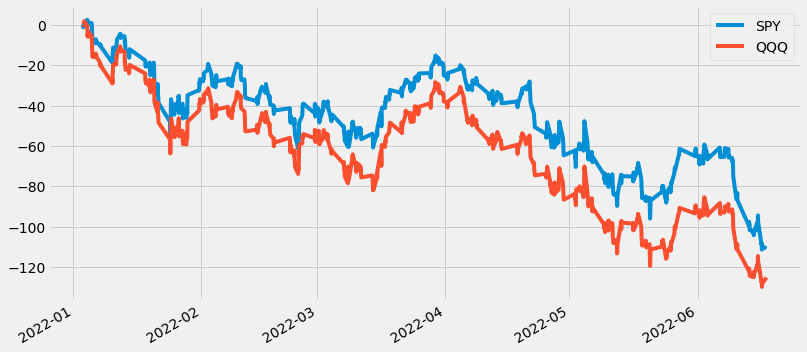

In [45]:
def scale_data(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 
def shift_data(df):
  return df-df.iloc[0]

stocks = shift_data(stocks)
stocks_ = stocks.pct_change()
stocks.plot()

## Simulate a 1:1 long-short strategy

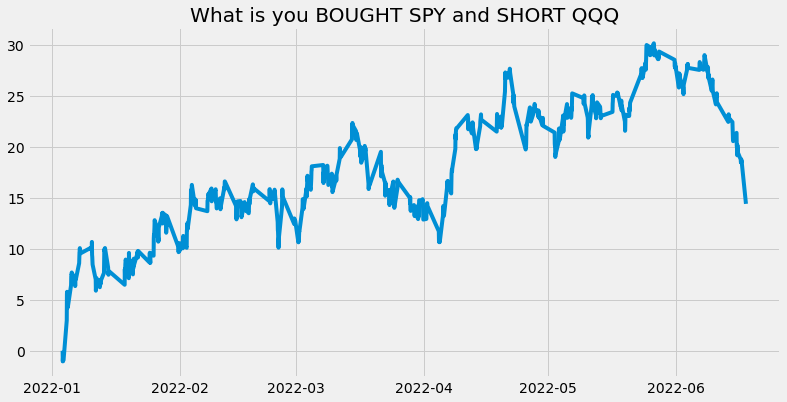

In [51]:
diff = stocks.iloc[:, 0] - stocks.iloc[:, 1]
_=plt.title(f'What is you BOUGHT {ls[0]} and SHORT {ls[1]}')
_=plt.plot(diff)